In [196]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [197]:
Sales = pd.read_csv("sales.csv")
Features = pd.read_csv("features.csv")
Stores = pd.read_csv("stores.csv")

In [198]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [199]:
ct = ColumnTransformer(transformers=[("transformer",OneHotEncoder(),[1])],remainder="passthrough")
Stores = ct.fit_transform(Stores)
Stores = pd.DataFrame(Stores,columns=["A","B","C","Store","Size"])
Stores = Stores.drop(["Store"],axis=1)

In [200]:
Sales = Sales.groupby(by=["Store","Date"]).sum()
Sales.drop(["Dept","IsHoliday"],axis=1,inplace=True)
Sales = Sales.reset_index()
Sales = Sales["Weekly_Sales"]

In [201]:
enc = OrdinalEncoder()
enc = OrdinalEncoder()
Features[["Date"]] = enc.fit_transform(Features[["Date"]])
separation_date = enc.transform([["2012-10-26"]])[0][0]
print(separation_date)


142.0


c:\Users\hasan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


In [202]:
Features_without_sales = Features[Features["Date"] >separation_date]
Features = Features[Features["Date"]<=separation_date]
Features = Features.reset_index()
Features=Features.drop(["index"],axis=1)
Features_without_sales = Features_without_sales.reset_index()
Features_without_sales = Features_without_sales.drop(["index"],axis=1)

In [203]:
lst = []
store_columns = Stores.columns
columns = list(Features.columns) + list(store_columns)
Stores = Stores.values
for i in Features.values:
    i = list(i)
    i.extend(Stores[i[0]-1])
    lst.append(i)
Features = pd.DataFrame(lst,columns=columns)
print(Features)

      Store   Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0         1    0.0        42.31       2.572        NaN        NaN        NaN   
1         1    1.0        38.51       2.548        NaN        NaN        NaN   
2         1    2.0        39.93       2.514        NaN        NaN        NaN   
3         1    3.0        46.63       2.561        NaN        NaN        NaN   
4         1    4.0        46.50       2.625        NaN        NaN        NaN   
...     ...    ...          ...         ...        ...        ...        ...   
6430     45  138.0        64.88       3.997    4556.61      20.64       1.50   
6431     45  139.0        64.89       3.985    5046.74        NaN      18.82   
6432     45  140.0        54.47       4.000    1956.28        NaN       7.89   
6433     45  141.0        56.47       3.969    2004.02        NaN       3.18   
6434     45  142.0        58.85       3.882    4018.91      58.08     100.00   

      MarkDown4  MarkDown5         CPI 

In [204]:
lst = []
columns = list(Features_without_sales.columns) + list(store_columns)
for i in Features_without_sales.values:
    i = list(i)
    i.extend(Stores[i[0]-1])
    lst.append(i)
Features_without_sales = pd.DataFrame(lst,columns=columns)
Features_without_sales = pd.DataFrame(lst,columns=columns)

print(Features_without_sales)

      Store   Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0         1  143.0        55.32       3.386    6766.44    5147.70      50.82   
1         1  144.0        61.24       3.314   11421.32    3370.89      40.28   
2         1  145.0        52.92       3.252    9696.28     292.10     103.78   
3         1  146.0        56.23       3.211     883.59       4.17   74910.32   
4         1  147.0        52.34       3.207    2460.03        NaN    3838.35   
...     ...    ...          ...         ...        ...        ...        ...   
1750     45  177.0        76.05       3.639    4842.29     975.03       3.00   
1751     45  178.0        77.50       3.614    9090.48    2268.58     582.74   
1752     45  179.0        79.37       3.614    3789.94    1827.31      85.72   
1753     45  180.0        82.84       3.737    2961.49    1047.07     204.19   
1754     45  181.0        76.06       3.804     212.02     851.73       2.06   

      MarkDown4  MarkDown5         CPI 

In [205]:
print(pd.isnull(Features).sum())

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4155
MarkDown2       4798
MarkDown3       4389
MarkDown4       4470
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
A                  0
B                  0
C                  0
Size               0
dtype: int64


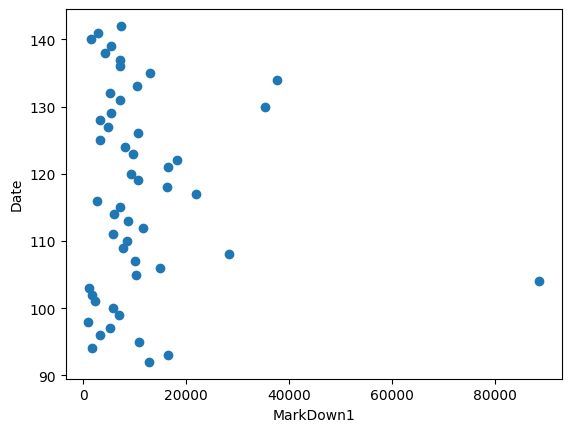

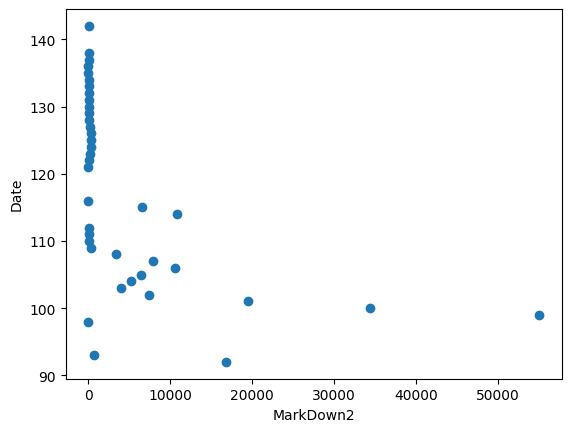

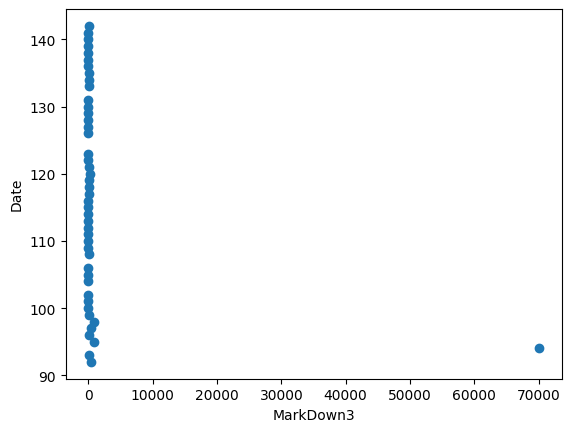

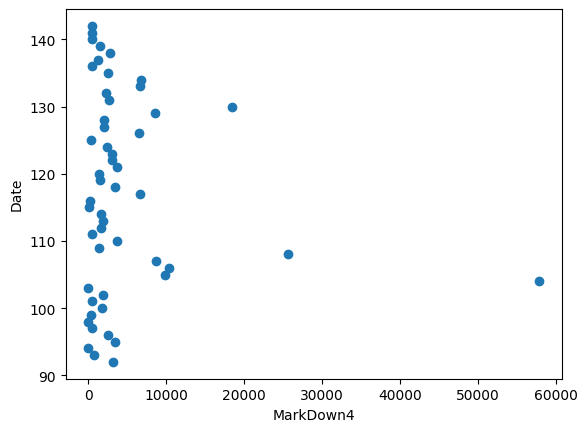

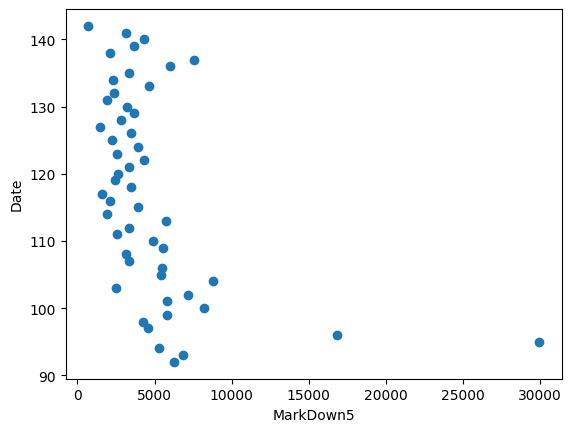

In [206]:
Features["Sales"] = Sales
Features_for_Store1= Features[Features["Store"] == 22]
for i in ["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]:
    plt.xlabel(i)
    plt.ylabel("Date")
    plt.scatter(Features_for_Store1[i],Features_for_Store1["Date"])
    plt.show()

In [207]:
Features_without_sales=Features_without_sales.drop(["Store"],axis=1)
Features=Features.drop(["Store"],axis=1)

In [208]:
Y = Features["Sales"]
Features.drop(["Sales"],axis=1)

,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,A,B,C,Size
0,0.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1.0,0.0,0.0,151315.0
1,1.0,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,1.0,0.0,0.0,151315.0
2,2.0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,1.0,0.0,0.0,151315.0
3,3.0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,1.0,0.0,0.0,151315.0
4,4.0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,1.0,0.0,0.0,151315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,138.0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False,0.0,1.0,0.0,118221.0
6431,139.0,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False,0.0,1.0,0.0,118221.0
6432,140.0,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False,0.0,1.0,0.0,118221.0
6433,141.0,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False,0.0,1.0,0.0,118221.0


In [209]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Features,Y,random_state=3,test_size=0.3)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train=imputer.fit_transform(X_train)
print(X_train)

[[5.90000000e+01 7.03300000e+01 3.47300000e+00 ... 1.00000000e+00
  4.29880000e+04 4.31754010e+05]
 [7.10000000e+01 6.33500000e+01 3.70400000e+00 ... 0.00000000e+00
  2.19622000e+05 2.08643349e+06]
 [7.80000000e+01 7.82200000e+01 3.84200000e+00 ... 0.00000000e+00
  1.18221000e+05 7.65996920e+05]
 ...
 [3.20000000e+01 6.03100000e+01 2.84600000e+00 ... 0.00000000e+00
  2.03819000e+05 1.27329546e+06]
 [1.15000000e+02 6.67300000e+01 4.22200000e+00 ... 0.00000000e+00
  1.12238000e+05 1.00648696e+06]
 [1.31000000e+02 9.07800000e+01 3.81100000e+00 ... 1.00000000e+00
  3.96900000e+04 5.76620310e+05]]


In [210]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train,y_train)

RandomForestRegressor()

In [211]:
from xgboost import XGBRegressor
xgboost = XGBRegressor()
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [212]:
X_test = imputer.transform(X_test)

In [213]:
xgboost.score(X_test,y_test)

0.9999190984718772

In [214]:
random_forest.score(X_test,y_test)

0.9998351662535909

In [215]:
from sklearn.metrics import r2_score
preds_xgb = xgboost.predict(X_test)
print("Xgboost score: "+str(r2_score(y_test, preds_xgb)))
preds_random_forest = random_forest.predict(X_test)
print("Random Forest: "+str(r2_score(y_test, preds_random_forest)))

Xgboost score: 0.9999190984718772
Random Forest: 0.9998351662535909


In [216]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
Features=imputer.fit_transform(Features)
print(Features)
Features = pd.DataFrame(Features)

[[0.00000000e+00 4.23100000e+01 2.57200000e+00 ... 0.00000000e+00
  1.51315000e+05 1.64369090e+06]
 [1.00000000e+00 3.85100000e+01 2.54800000e+00 ... 0.00000000e+00
  1.51315000e+05 1.64195744e+06]
 [2.00000000e+00 3.99300000e+01 2.51400000e+00 ... 0.00000000e+00
  1.51315000e+05 1.61196817e+06]
 ...
 [1.40000000e+02 5.44700000e+01 4.00000000e+00 ... 0.00000000e+00
  1.18221000e+05 7.34464360e+05]
 [1.41000000e+02 5.64700000e+01 3.96900000e+00 ... 0.00000000e+00
  1.18221000e+05 7.18125530e+05]
 [1.42000000e+02 5.88500000e+01 3.88200000e+00 ... 0.00000000e+00
  1.18221000e+05 7.60281430e+05]]


In [217]:
from sklearn.model_selection import cross_val_score
acc_xgb = cross_val_score(xgboost,Features,Sales)
acc_ran = cross_val_score(random_forest,Features,Sales)
print(acc_xgb)
print(acc_ran)

[0.99991236 0.99986592 0.99981472 0.99993302 0.99995785]
[0.99989926 0.99986774 0.99983601 0.99990145 0.99999783]
